# Exploratory Data Analysis

Before conducting the deep clustering, we need to analyse our data and see if we can find any patterns hidden within. Analysis of the graphs created here is discussed in detail in the essay.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/tom/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/tom/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Read in the data

In [2]:
query_1 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data_pulled_24_jan/query_1.csv')
query_2 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data_pulled_24_jan/query_2.csv')
query_3 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data_pulled_24_jan/query_3.csv')
query_4 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data_pulled_24_jan/query_4.csv')
query_5 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data_pulled_24_jan/query_5.csv')
query_6 = pd.read_csv('/home/tom/Documents/ParlayPlay/Data_pulled_24_jan/query_6.csv')
new_coupon_data = pd.read_csv('/home/tom/Documents/ParlayPlay/Data_pulled_24_jan/new_coupon_desg_data.csv')


In [3]:
df_raw = pd.merge(query_1, query_2, how='left', left_on='id', right_on = 'username_id')
df_raw = pd.merge(df_raw, query_3, how='left', on='username')
df_raw = pd.merge(df_raw, query_4, how='left', on='id')
df_raw = pd.merge(df_raw, query_5, how='left', left_on='id', right_on = 'username_id')
df_raw = pd.merge(df_raw, query_6, how='left', on='username')
df_raw = df_raw.drop(columns = ['coupon_designation'])
df_raw = pd.merge(df_raw, new_coupon_data, how='left', on='username')


Clean and preprocess the data pre-analysis:

In [5]:
df = df_raw.fillna(0)

In [6]:
def na_coupon(x):
    if x == 0:
        return "Unattributed"
    else:
        return x


In [7]:
df.coupon_designation = df.coupon_designation.apply(lambda x: na_coupon(x))

## Analysis of FTD Users

Analysing the how many users place deposits with the platform

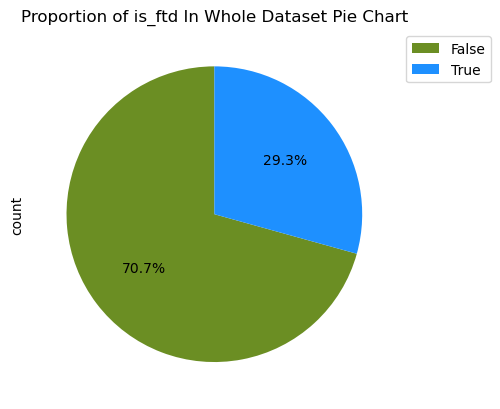

In [9]:
df['is_ftd'].value_counts().plot(kind='pie', labels = None,  colors = ["olivedrab", "dodgerblue"], startangle=90, legend =True,  autopct='%1.1f%%')
plt.legend(labels = df['is_ftd'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of is_ftd In Whole Dataset Pie Chart')
plt.show()


## Analysis of Active FTD Users

Seeing how many ftd and non_ftd users actually interact with the platform.

In [10]:
df_ftd = df[df['is_ftd'] == True]
df_non_ftd = df[df['is_ftd'] == False]


In [11]:
def zero_contests(x):
    if x > 0:
        return "non_zero_contest_count"
    else:
        return "zero_contest_count"


In [12]:
df_non_ftd['zero_contests'] = df_non_ftd['contest_count'].apply(lambda x: zero_contests(x))


/tmp/ipykernel_356191/3719196630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_ftd['zero_contests'] = df_non_ftd['contest_count'].apply(lambda x: zero_contests(x))


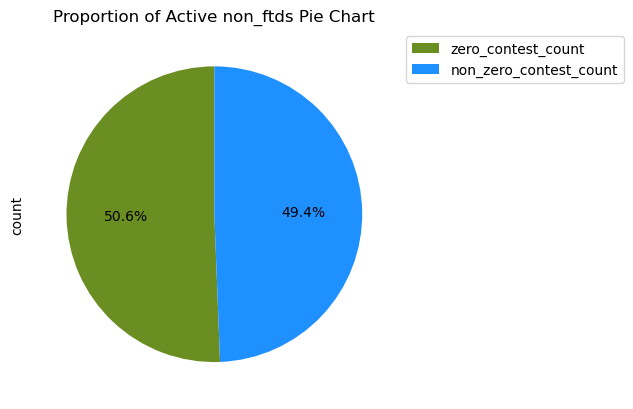

In [13]:
df_non_ftd['zero_contests'].value_counts().plot(kind='pie', labels = None, colors = ["olivedrab", "dodgerblue"], startangle=90, legend =True, autopct='%1.1f%%')
plt.legend(labels = df_non_ftd['zero_contests'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of Active non_ftds Pie Chart')
plt.show()


In [14]:
df_ftd['zero_contests'] = df_ftd['contest_count'].apply(lambda x: zero_contests(x))


/tmp/ipykernel_356191/3008847988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ftd['zero_contests'] = df_ftd['contest_count'].apply(lambda x: zero_contests(x))


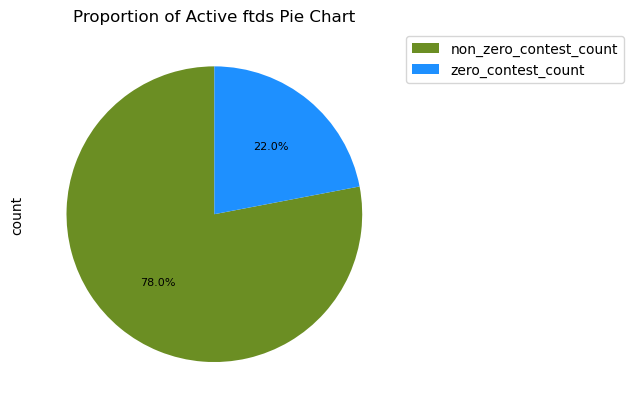

In [15]:
df_ftd['zero_contests'].value_counts().plot(kind='pie', labels = None, colors = ["olivedrab", "dodgerblue"], startangle=90, legend =True, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.legend(labels = df_ftd['zero_contests'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of Active ftds Pie Chart')
plt.show()


## Analysis of Age

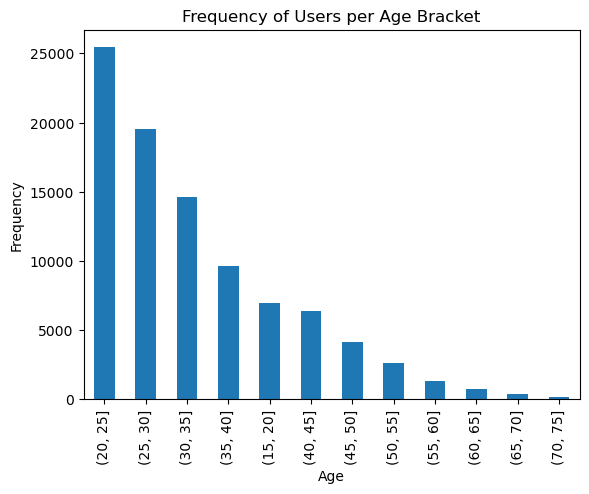

In [16]:
pd.cut(df_ftd["age"], np.arange(15, 80, 5)).value_counts().plot(kind = 'bar')
plt.title("Frequency of Users per Age Bracket")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


/tmp/ipykernel_356191/2064023533.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ftd['net_cash'].groupby(pd.cut(df_ftd["age"], np.arange(15, 80, 5))).mean().plot(kind = 'bar')


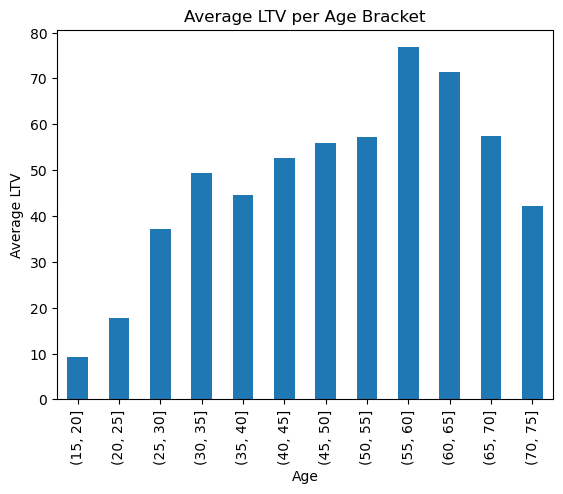

In [17]:
df_ftd['net_cash'].groupby(pd.cut(df_ftd["age"], np.arange(15, 80, 5))).mean().plot(kind = 'bar')
plt.title("Average LTV per Age Bracket")
plt.ylabel("Average LTV")
plt.xlabel('Age')
plt.show()


/tmp/ipykernel_356191/3113887906.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ftd['contest_count'].groupby(pd.cut(df_ftd["age"], np.arange(15, 80, 5))).mean().plot(kind = 'bar')


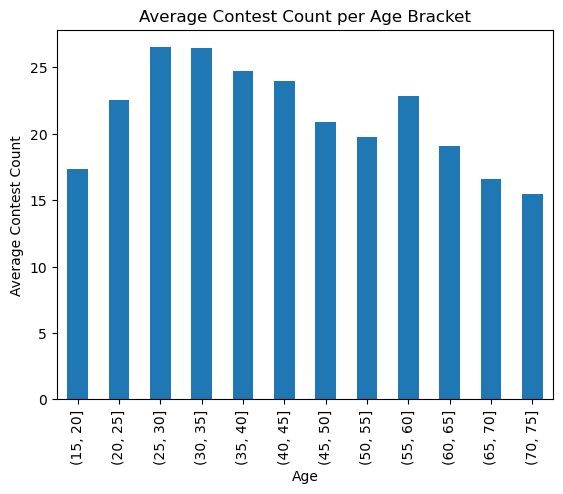

In [18]:
df_ftd['contest_count'].groupby(pd.cut(df_ftd["age"], np.arange(15, 80, 5))).mean().plot(kind = 'bar')
plt.title("Average Contest Count per Age Bracket")
plt.ylabel("Average Contest Count")
plt.xlabel('Age')
plt.show()


## Analysis of Coupon Designation

Analysis of what the users used to sign up to the site.

In [19]:
c = ["Olivedrab", "Dodgerblue", "Navajowhite",
    "Saddlebrown", "Darkseagreen", "Darkorange",
    "Darkslategray", "Darkviolet", "Mediumaquamarine",
    "Tomato", "Slateblue"]


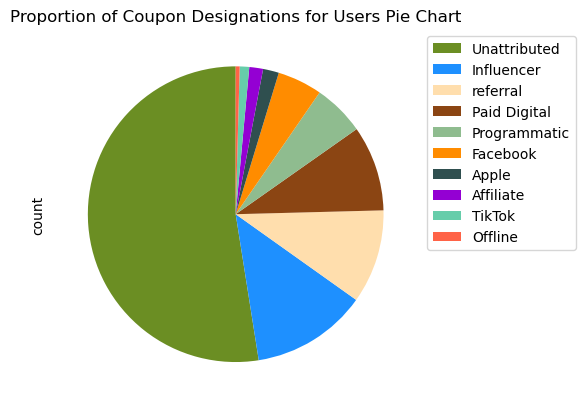

In [20]:
df_ftd['coupon_designation'].value_counts().plot(kind='pie', labels = None, colors = c, startangle=90, legend =True, textprops={'fontsize': 8})
plt.legend(labels = df_ftd['coupon_designation'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of Coupon Designations for Users Pie Chart')
plt.show()


In [21]:
df_ftd['coupon_designation'].value_counts()


coupon_designation
Unattributed    48425
Influencer      11684
referral         9460
Paid Digital     8619
Programmatic     5199
Facebook         4517
Apple            1602
Affiliate        1388
TikTok            955
Offline           399
Name: count, dtype: int64

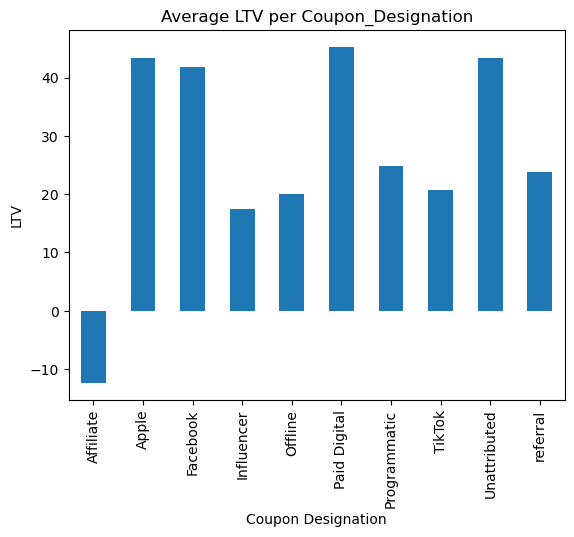

In [25]:
df_ftd[['coupon_designation','net_cash']].groupby('coupon_designation').mean().plot(kind='bar')
plt.title("Average LTV per Coupon_Designation")
plt.legend().remove()
plt.xlabel("Coupon Designation")
plt.ylabel("LTV")
plt.show()


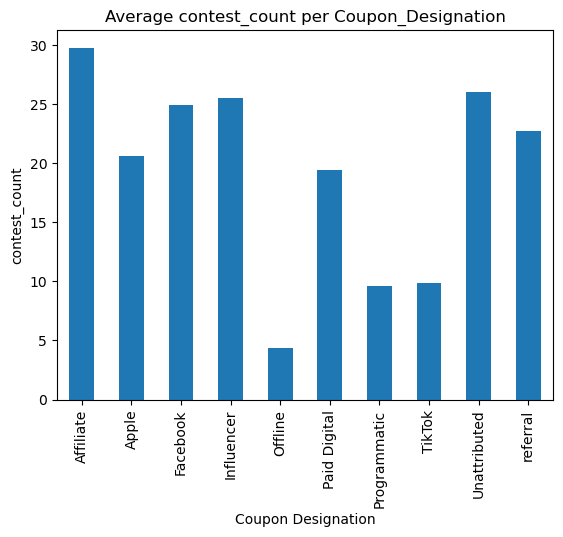

In [26]:
df_ftd[['coupon_designation','contest_count']].groupby('coupon_designation').mean().plot(kind='bar')
plt.title("Average contest_count per Coupon_Designation")
plt.legend().remove()
plt.xlabel("Coupon Designation")
plt.ylabel("contest_count")
plt.show()


## Analysis of Sign Up Times

Analysing how the time users sign up affects their long term engagement with the company.

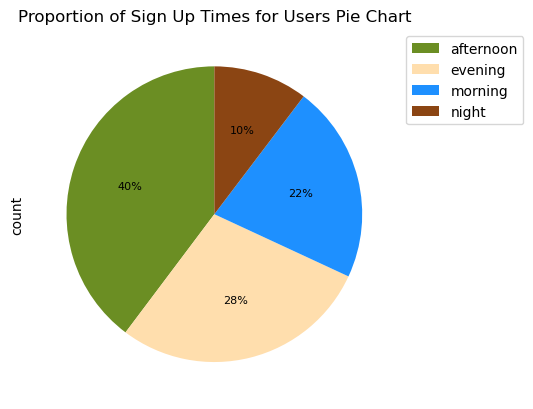

In [33]:
df_ftd['sign_up_time'].value_counts().plot(kind='pie', labels = None, colors = ["Olivedrab", "Navajowhite", "Dodgerblue",
    "Saddlebrown"], startangle=90, legend =True, textprops={'fontsize': 8}, autopct='%1.0f%%')
plt.legend(labels = df_ftd['sign_up_time'].value_counts().index, loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Proportion of Sign Up Times for Users Pie Chart')
plt.show()

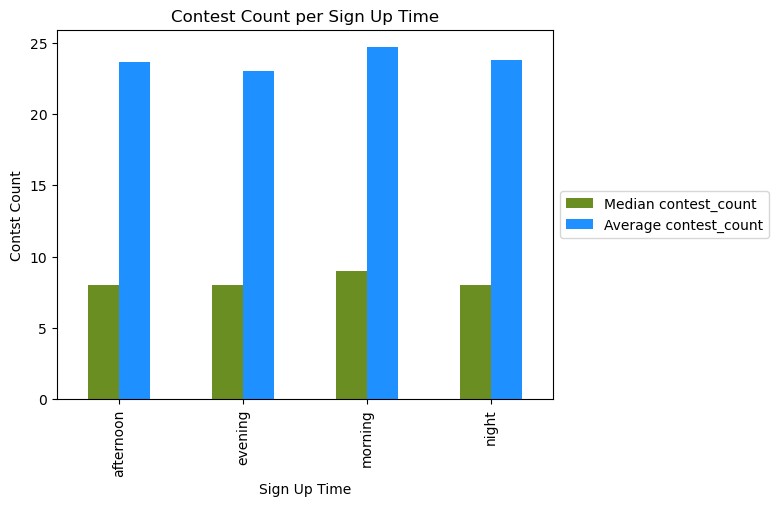

In [40]:
df_mean_av_sign_up = df_ftd.groupby('sign_up_time').contest_count.mean()
df_median_av_sign_up = df_ftd.groupby('sign_up_time').contest_count.median()
both_dfs = pd.concat([df_median_av_sign_up, df_mean_av_sign_up], axis = 1)
both_dfs = both_dfs.set_axis(['Median contest_count', 'Average contest_count'], axis=1)
both_dfs.plot(kind = 'bar', color=["Olivedrab", "Dodgerblue"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Contst Count")
plt.xlabel("Sign Up Time")
plt.title("Contest Count per Sign Up Time")
plt.show()

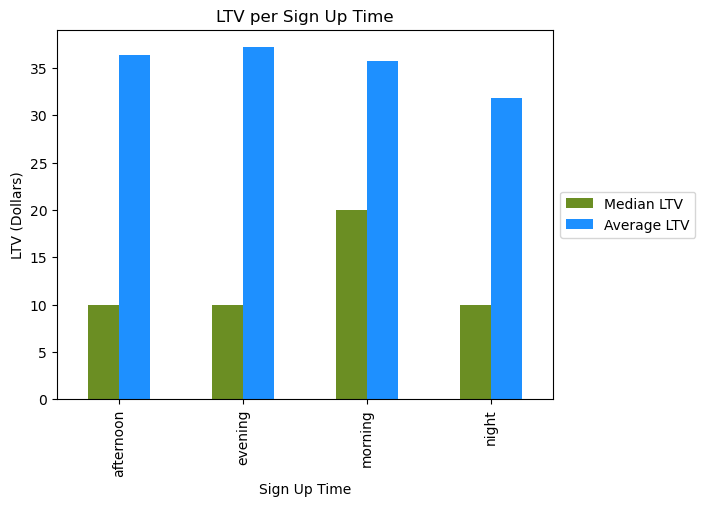

In [41]:
df_mean_av_sign_up = df_ftd.groupby('sign_up_time').net_cash.mean()
df_median_av_sign_up = df_ftd.groupby('sign_up_time').net_cash.median()
both_dfs = pd.concat([df_median_av_sign_up, df_mean_av_sign_up], axis = 1)
both_dfs = both_dfs.set_axis(['Median LTV', 'Average LTV'], axis=1)
both_dfs.plot(kind = 'bar', color=["Olivedrab", "Dodgerblue"])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("LTV (Dollars)")
plt.xlabel("Sign Up Time")
plt.title("LTV per Sign Up Time")
plt.show()

## Analysis of Limiting Users - (Efficacy of Company Wide Policies)

In [27]:
df_ftd_drop_lim = df_ftd[df_ftd['is_limited'] == False]


/tmp/ipykernel_356191/2430981767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ftd_drop_lim_ltv_num_picks = df_ftd_drop_lim['net_cash'].groupby(pd.cut(df_ftd_drop_lim["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()
/tmp/ipykernel_356191/2430981767.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ftd_all_ltv_num_picks = df_ftd['net_cash'].groupby(pd.cut(df_ftd["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()


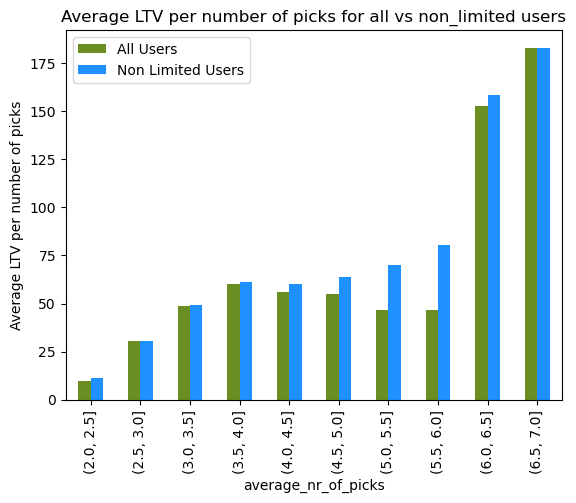

In [28]:
df_ftd_drop_lim_ltv_num_picks = df_ftd_drop_lim['net_cash'].groupby(pd.cut(df_ftd_drop_lim["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()
df_ftd_all_ltv_num_picks = df_ftd['net_cash'].groupby(pd.cut(df_ftd["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()

both_dfs = pd.merge(df_ftd_all_ltv_num_picks, df_ftd_drop_lim_ltv_num_picks, on = "average_nr_of_picks")
both_dfs = both_dfs.set_axis(['All Users', 'Non Limited Users'], axis=1)

both_dfs.plot(kind = 'bar', color=["olivedrab", "dodgerblue"])
plt.ylabel("Average LTV per number of picks")
plt.title("Average LTV per number of picks for all vs non_limited users")

plt.show()


/tmp/ipykernel_356191/3921344662.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ftd_drop_lim_ltv_num_picks = df_ftd_drop_lim['contest_count'].groupby(pd.cut(df_ftd_drop_lim["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()
/tmp/ipykernel_356191/3921344662.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ftd_all_ltv_num_picks = df_ftd['contest_count'].groupby(pd.cut(df_ftd["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()


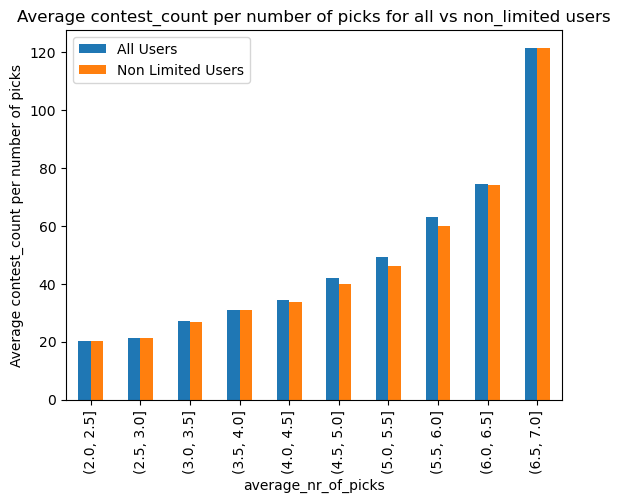

In [29]:
df_ftd_drop_lim_ltv_num_picks = df_ftd_drop_lim['contest_count'].groupby(pd.cut(df_ftd_drop_lim["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()
df_ftd_all_ltv_num_picks = df_ftd['contest_count'].groupby(pd.cut(df_ftd["average_nr_of_picks"], np.arange(2, 7.5, 0.5))).mean()

both_dfs = pd.merge(df_ftd_all_ltv_num_picks, df_ftd_drop_lim_ltv_num_picks, on = "average_nr_of_picks")
both_dfs = both_dfs.set_axis(['All Users', 'Non Limited Users'], axis=1)

both_dfs.plot(kind = 'bar')
plt.ylabel("Average contest_count per number of picks")
plt.title("Average contest_count per number of picks for all vs non_limited users")

plt.show()